In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [3]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X) # mezcla de 2 componentes gaussianos entrenado usando expectation-maximization

## GMM como distribución de probabilidad(función de densidad)

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

In [4]:
def mixture_pdf(X,gmm):
  w = gmm.weights_ #pesos w
  means = gmm.means_ #medias de cada componente gaussiano
  covs = gmm.covariances_ #matrices de coovarianza de cada componente gaussiano

  pdf = (w[0]*multivariate_normal.pdf(X,mean=means[0],cov=covs[0])) + (w[1]*multivariate_normal.pdf(X,mean=means[1],cov=covs[1]))

  return pdf

In [5]:
print("Densidad de probabilidad para X:")
print(mixture_pdf(X,gm))


Densidad de probabilidad para X:
[48.73104094 23.01892029 23.01892029 48.73104094 23.01892029 23.01892029]


La función score_samples de sklearn devuelve el logaritmo del likelihood(densidad)

In [6]:
gm.score_samples(X)

array([3.88631622, 3.1363165 , 3.1363165 , 3.88631622, 3.1363165 ,
       3.1363165 ])

Por lo tanto si tomamos la exponencial de score_samples debemos obtener el likelihood(mismo valor obtenido por nuestra función mixture_pdf)

In [7]:
print("Densidad de probabilidad para X:")
np.exp(gm.score_samples(X))

Densidad de probabilidad para X:


array([48.73104094, 23.01892029, 23.01892029, 48.73104094, 23.01892029,
       23.01892029])

## GMM cómo algoritmo/modelo generativo

Dado que GMM contiene un modelo probabilístico(función de densidad) podemos utilizarlo para generar nuevos datos con distintos propósitos:


*   Obtener muestras aleatorias que siguen la distribución de probabilidad.
  * Esto a su vez nos puede servir para realizar **simulación y estimación de Monte Carlo**
*   Obtener nuevos datos, por ejemplo imágenes

Por ejemplo, dada una variable aleatoria Y = g(X) estimar su distribución y valor esperado:





In [9]:
def g(X):
  x1 = X[:,0]
  x2 = X[:,1]
  return -(np.sin(x1) + 0.5*x1 + np.cos(x2)) + 8

In [10]:
muestra,cluster = gm.sample(5000)

muestra_g = g(muestra)
valor_esperado_g = np.mean(muestra_g)

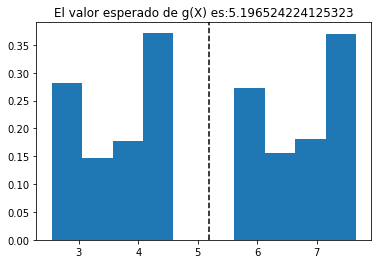

In [11]:
plt.hist(muestra_g, density=True)
plt.axvline(valor_esperado_g,color="k",linestyle="--")
plt.title("El valor esperado de g(X) es:{}".format(valor_esperado_g))

plt.show()